In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape


(1406, 24)

In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

### Data visualization and pre-processing
Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.

In [6]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [7]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.

Lets plot some columns to underestand the data better:

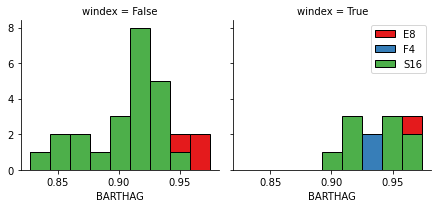

In [8]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

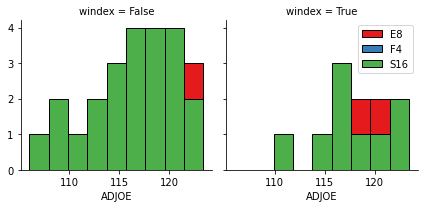

In [9]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Pre-processing: Feature selection/extraction
Lets look at how Adjusted Defense Efficiency plots

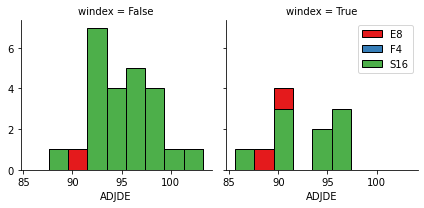

In [10]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### Convert Categorical features to numerical values


In [11]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)


windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

In [12]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


#### Feature selection


In [13]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [14]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [15]:
# Normalize Data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

### Training and Validation

In [16]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


## K Nearest Neighbor(KNN)
Question 1 Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)

You can use  accuracy_score</cdoe>

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k=5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_val)


from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("X Test set Accuracy: ", metrics.accuracy_score(y_val, yhat))


Train set Accuracy:  0.6363636363636364
X Test set Accuracy:  0.6666666666666666


### Question  2 Determine and print the accuracy for the first 15 values of k on the validation data:



In [18]:
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)

    
    std_acc[n-1]=np.std(yhat==y_val)/np.sqrt(yhat.shape[0])

mean_acc


array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333, 0.58333333])

## Decision Tree



The following lines of code fit a DecisionTreeClassifier:

['S16' 'S16' 'S16' 'S16' 'S16']
['F4' 'S16' 'S16' 'S16' 'S16']
DecisionTrees's Accuracy:  0.6666666666666666


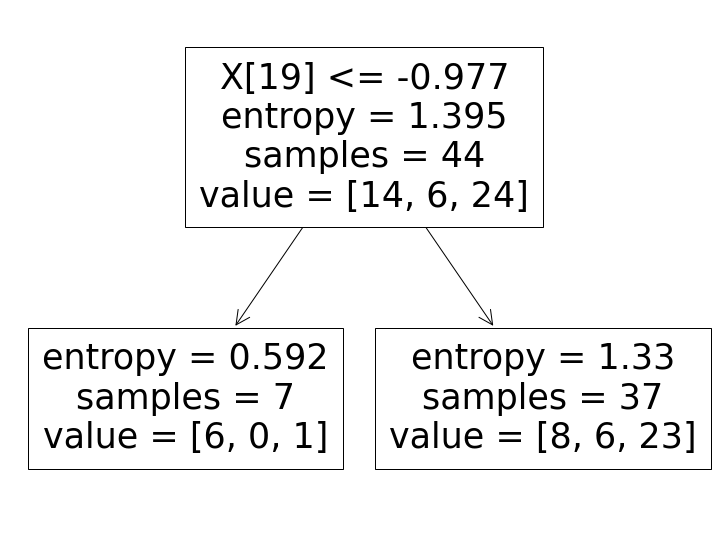

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
DT.fit(X_train,y_train)
predTree = DT.predict(X_val)
print (predTree [0:5])
print (y_val [0:5])
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_val, predTree))
plt.figure(figsize=(12.8, 9.6))
tree.plot_tree(DT)
plt.show()


## Question  3 Determine the minumum   value for the parameter max_depth that improves results

In [20]:
depths = 22
mean_acc_DT = np.zeros((depths-1))
std_acc_DT = np.zeros((depths-1))
min_max_depth=1
for n in range(1,depths):
    
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    DT.fit(X_train,y_train)
    predTree = DT.predict(X_val)
    mean_acc_DT[n-1] = metrics.accuracy_score(y_val, predTree)
    std_acc_DT[n-1]=np.std(predTree==y_val)/np.sqrt(predTree.shape[0])

    
for m in range(1,depths):
    if mean_acc_DT[m-1] > max(mean_acc_DT):
        min_max_depth=mean_acc_DT[n-1]
    
print('The minimmum max depth is: ' + str(min_max_depth))
mean_acc_DT


The minimmum max depth is: 1


array([0.66666667, 0.66666667, 0.5       , 0.33333333, 0.41666667,
       0.41666667, 0.5       , 0.5       , 0.5       , 0.41666667,
       0.41666667, 0.5       , 0.5       , 0.41666667, 0.41666667,
       0.5       , 0.5       , 0.41666667, 0.41666667, 0.41666667,
       0.41666667])

## Support Vector Machine

Question  4 Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

In [21]:
from sklearn import svm
ker=['linear', 'poly', 'rbf', 'sigmoid']
SVM = svm.SVC(kernel=ker[3])
SVM.fit(X_train, y_train)
yhat = SVM.predict(X_val)
print(yhat [0:5])
y_val
from sklearn.metrics import f1_score
f1_score(y_val, yhat, average='weighted')


['S16' 'S16' 'S16' 'E8' 'E8']


0.5372549019607843

In [22]:
ker=['linear', 'poly', 'rbf', 'sigmoid']
n=0
SVM_acc_array = np.zeros(4)
best_ker_int=int
for n in range (0,4):
    SVM = svm.SVC(kernel=ker[n])
    SVM.fit(X_train, y_train)
    yhat = SVM.predict(X_val)
    SVM_acc_array[n] = f1_score(y_val, yhat, average='weighted')
for n in range (0,4):
    if SVM_acc_array[n]==max(SVM_acc_array):
        best_ker_int=n
best_ker=ker[best_ker_int]
print('The best kernel is: ' + best_ker + ', with an f1 score of: '+ str(round(SVM_acc_array[best_ker_int],3)))

The best kernel is: sigmoid, with an f1 score of: 0.537


## Logistic Regression



Question 5 Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_val)
yhat_prob = LR.predict_proba(X_val)
from sklearn.metrics import jaccard_score
print('Jaccard score:' + str(jaccard_score(y_val, yhat,pos_label=0, average='micro')))
print('F1 score: '+ str(f1_score(y_val, yhat, average='weighted')))

Jaccard score:0.4117647058823529
F1 score: 0.6245421245421245


C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


# Model Evaluation using Test set


In [25]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [26]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1


## Question  5 Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. For f1_score please set the average parameter to 'micro'.

### Load Test set for evaluation


In [27]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [28]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [29]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]


array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [30]:
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
KNNyhat=neigh.predict(X_val)
acc = metrics.accuracy_score(y_val, KNNyhat)
print('The accuracy is: '+ str(acc))
print('Jaccard score:' + str(jaccard_score(y_val, KNNyhat,pos_label=0, average='micro')))
print('F1 score: '+ str(f1_score(y_val, KNNyhat, average='weighted')))


The accuracy is: 0.6666666666666666
Jaccard score:0.5
F1 score: 0.6777777777777777


C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [31]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
DT.fit(X_train,y_train)
predTree = DT.predict(X_val)
DTacc = metrics.accuracy_score(y_val, predTree)
print('The accuracy is: '+ str(DTacc))
print('Jaccard score:' + str(jaccard_score(y_val, predTree,pos_label=0, average='micro')))
print('F1 score: '+ str(f1_score(y_val, predTree, average='weighted')))


The accuracy is: 0.6666666666666666
Jaccard score:0.5
F1 score: 0.5614035087719299


C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [32]:
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(X_train, y_train)
SVMyhat = SVM.predict(X_val)
SVMacc = metrics.accuracy_score(y_val, SVMyhat)
print('The accuracy is: '+ str(SVMacc))
print('Jaccard score:' + str(jaccard_score(y_val, SVMyhat,pos_label=0, average='micro')))
print('F1 score: '+ str(f1_score(y_val, SVMyhat, average='weighted')))


The accuracy is: 0.5833333333333334
Jaccard score:0.4117647058823529
F1 score: 0.5372549019607843


C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [33]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LRyhat = LR.predict(X_val)
yhat_prob = LR.predict_proba(X_val)
LRacc = metrics.accuracy_score(y_val, LRyhat)
print('The accuracy is: '+ str(LRacc))
print('Jaccard score:' + str(jaccard_score(y_val, LRyhat,pos_label=0, average='micro')))
print('F1 score: '+ str(f1_score(y_val, LRyhat, average='weighted')))
print("LogLoss: : %.2f" % log_loss(y_val, yhat_prob))



The accuracy is: 0.5833333333333334
Jaccard score:0.4117647058823529
F1 score: 0.6245421245421245
LogLoss: : 1.10


C:\Users\ronal\Anaconda3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
